# Importing Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, silhouette_score

# KNN on Breast Cancer Dataset

In [22]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9590643274853801


# Plotting Dicision boubdary for Breast Cancer Dataset : Considering `first 2` columns

In [8]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data[:, :2]  # Use the first two features for visualization
y = data.target

In [12]:
# Create a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
print("X_train size : ", len(X_train))
print("X_test size : ", len(X_test))
print("y_train : ", len(y_train))
print("y_test : ", len(y_test))

X_train size :  398
X_test size :  171
y_train :  398
y_test :  171


In [15]:
# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# Make predictions on the test set
predictions = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8771929824561403


In [16]:
# Define a meshgrid for plotting the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Meshgrid shape: (1579, 1157)


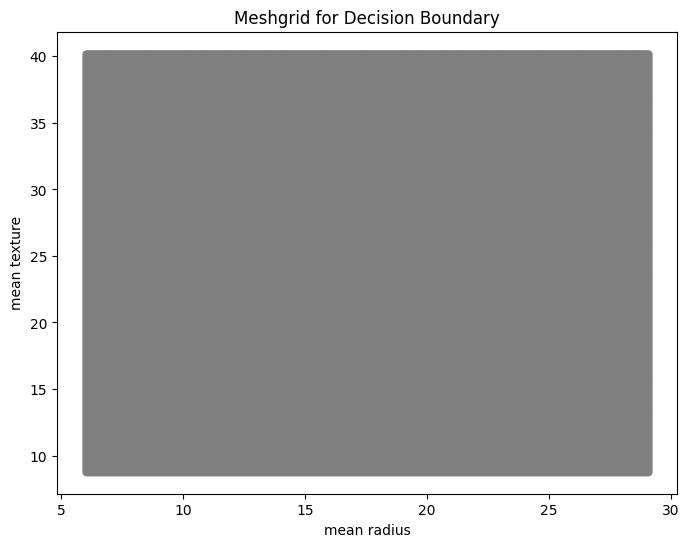

In [19]:
# Print the dimensions of the meshgrid
print("Meshgrid shape:", xx.shape)

# Plot the meshgrid
plt.figure(figsize=(8, 6))
plt.scatter(xx, yy, c='gray', marker='.', alpha=0.5)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Meshgrid for Decision Boundary")
plt.show()

In [17]:
# Make predictions on the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

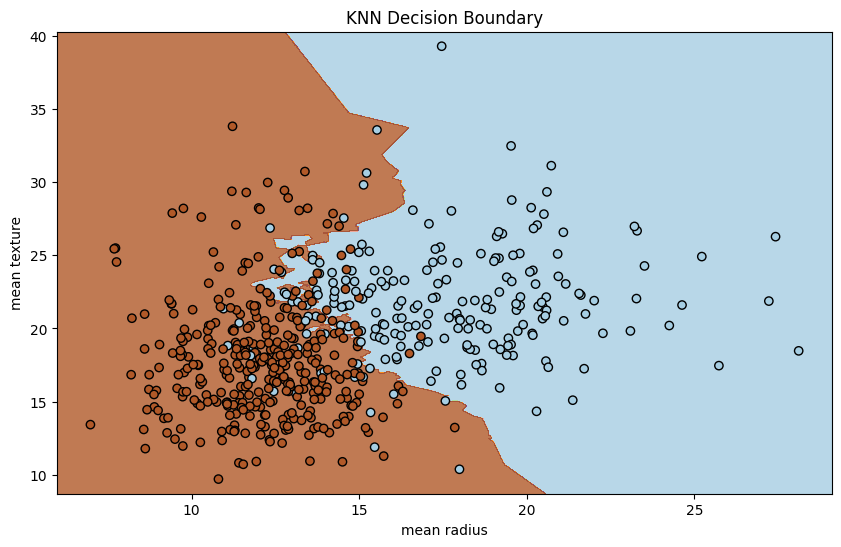

In [18]:
# Plot the decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("KNN Decision Boundary")
plt.show()

# Finding best value of `k` using `iterative way`

In [24]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Find the best value of k using cross-validation
best_accuracy = 0.0
best_k = None
for k in range(1, 21):  # Try different values of k
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
    avg_accuracy = np.mean(scores)
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_k = k

# Train the KNN classifier with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_knn.predict(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)

# Print the best k and accuracy
print("Best k:", best_k)
print("Accuracy:", accuracy)

Best k: 8
Accuracy: 0.9649122807017544


# `GridSearchCV` with cross validation to find `best value of k`

In [26]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of k values to search
param_grid = {'n_neighbors': np.arange(1, 21)}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best value of k and its corresponding accuracy
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

# Print the best k and accuracy
print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)

Best k: 8
Best Accuracy: 0.9169936708860759


# `RandomizedSearchCV` to find best value of k

In [29]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of k values to sample from
param_dist = {'n_neighbors': np.arange(1, 21)}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform random search with 5-fold cross-validation
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Get the best value of k and its corresponding accuracy
best_k = random_search.best_params_['n_neighbors']
best_accuracy = random_search.best_score_

# Print the best k and accuracy
print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)

Best k: 8
Best Accuracy: 0.9169936708860759


# `Elbow Method` to find best value of k

In [32]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize lists to store accuracy values for different k
k_values = []
accuracies = []

# Test different values of k
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    k_values.append(k)
    accuracies.append(accuracy)

# Create an interactive elbow plot using Plotly
fig = make_subplots(rows=1, cols=1, subplot_titles=['Elbow Method for KNN'])

trace = go.Scatter(x=k_values, y=accuracies, mode='lines+markers', name='Accuracy')
layout = go.Layout(
    title='Elbow Method for KNN',
    xaxis=dict(title='Number of Neighbors (k)'),
    yaxis=dict(title='Accuracy')
)
fig.add_trace(trace)
fig.update_layout(layout)

# Show the interactive plot
fig.show()

In [33]:
# Train the KNN classifier with the best k
best_k = 10 # observed from elbow method
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_knn.predict(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)

# Print the best k and accuracy
print("Best k:", best_k)
print("Accuracy:", accuracy)

Best k: 10
Accuracy: 0.9824561403508771


# Hyperparameters Tuning

In [42]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],  # Parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean)
    'leaf_size': [10, 20, 30, 40, 50, 60]  # Size of leaf nodes in KD Tree or Ball Tree
}

# Create the KNeighborsClassifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.9245886075949368
